In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#dataframe of original data
news_data = "../Original Database Files/OnlineNewsPopularity.csv"

news_df = pd.read_csv(news_data)

news_df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [3]:
#columns of shares
y = news_df[' shares']
y.head()

0     593
1     711
2    1500
3    1200
4     505
Name:  shares, dtype: int64

In [4]:
# first let's look at avg positivity 
X = news_df[' avg_positive_polarity']
X.head()

0    0.378636
1    0.286915
2    0.495833
3    0.385965
4    0.411127
Name:  avg_positive_polarity, dtype: float64

Text(0.5, 1.0, 'Avg Positivity vs Shares')

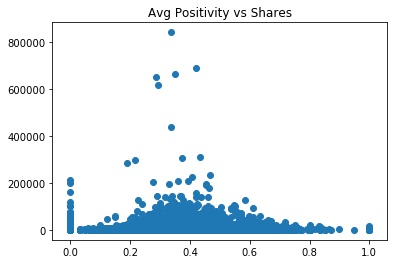

In [5]:
#graphing
plt.scatter(X,y)
plt.title("Avg Positivity vs Shares")

In [6]:
# Number of images 
X1 = news_df[' num_imgs']
X1.head()

0     1.0
1     1.0
2     1.0
3     1.0
4    20.0
Name:  num_imgs, dtype: float64

Text(0.5, 1.0, 'Number of Images vs Shares')

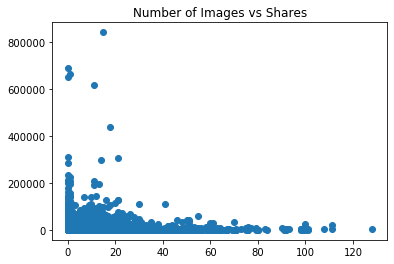

In [7]:
#images for shares
plt.scatter(X1,y)
plt.title("Number of Images vs Shares")

In [8]:
# global_subjectivity 
X2 = news_df[' global_subjectivity']
X2.head()

0    0.521617
1    0.341246
2    0.702222
3    0.429850
4    0.513502
Name:  global_subjectivity, dtype: float64

Text(0.5, 1.0, 'Global Subjectivity vs Shares')

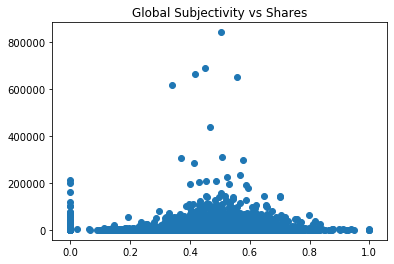

In [9]:
#graph
plt.scatter(X2,y)
plt.title("Global Subjectivity vs Shares")

In [10]:
# Rate of positive words
X3 = news_df[' rate_positive_words']
X3.head()

0    0.769231
1    0.733333
2    0.857143
3    0.666667
4    0.860215
Name:  rate_positive_words, dtype: float64

Text(0.5, 1.0, 'Rate of Positive Words vs Shares')

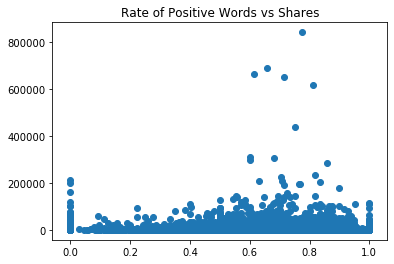

In [11]:
#graph
plt.scatter(X3,y)
plt.title("Rate of Positive Words vs Shares")

In [12]:
# Rate of Negative words
X3 = news_df[' rate_negative_words']
X3.head()

0    0.230769
1    0.266667
2    0.142857
3    0.333333
4    0.139785
Name:  rate_negative_words, dtype: float64

Text(0.5, 1.0, 'Rate of Negative Words vs Shares')

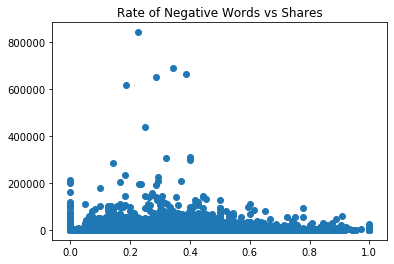

In [13]:
#graph 3
plt.scatter(X3,y)
plt.title("Rate of Negative Words vs Shares")

In [14]:
X4 = pd.Series(news_df[' data_channel_is_lifestyle'].values[:])
X5 = pd.Series(news_df[' data_channel_is_entertainment'].values[:])
X6 = pd.Series(news_df[' data_channel_is_bus'].values[:])
X7 = pd.Series(news_df[' data_channel_is_socmed'].values[:])
X8 = pd.Series(news_df[' data_channel_is_tech'].values[:])
X9 = pd.Series(news_df[' data_channel_is_world'].values[:])
X=pd.concat([X4,X5,X6,X7,X8,X9],ignore_index = True, axis = 0)
X
y=pd.concat([y,y,y,y,y,y],ignore_index = True, axis = 0)
y

0          593
1          711
2         1500
3         1200
4          505
          ... 
237859    1800
237860    1900
237861    1900
237862    1100
237863    1300
Name:  shares, Length: 237864, dtype: int64

# Logitisc Regression 

In [15]:
#convert data to vertical
X = np.array(X)
X = X.reshape(-1,1)
#X,y

In [16]:
#y = np.array(y)
#print(y[0:5])

In [17]:
# Trim down the dataset?
# should not do this unleass there is a form of statistical testing or inferencing of data.
#X = X[0:5000]
#y = y[0:5000]

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.80,random_state=1)

/Users/davidgae/miniconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [19]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [20]:
classifier.fit(X_train, y_train)

/Users/davidgae/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/davidgae/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [21]:
print(f"Training score: {classifier.score(X_train, y_train)}")
print(f"Testing score: {classifier.score(X_test, y_test)}")

Training score: 0.05844207030285195
Testing score: 0.05732243079057449


## Add Category Column

In [22]:
def label_category (row):
   if row[' data_channel_is_lifestyle'] == 1 :
      return 'Lifestyle'
   if row[' data_channel_is_entertainment'] == 1 :
      return 'Entertainment'
   if row[' data_channel_is_bus'] == 1:
      return 'Business'
   if row[' data_channel_is_socmed']  == 1:
      return 'Social Media'
   if row[' data_channel_is_tech'] == 1:
      return 'Technology'
   if row[' data_channel_is_world'] == 1:
      return 'World'
   return 'Other'

In [23]:
category = news_df.apply (lambda row: label_category(row), axis=1)

In [24]:
news_df["Category"]= category
news_df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,Category
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,Entertainment
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,Business
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,Business
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,Entertainment
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,Technology
